[*********************100%***********************]  1 of 1 completed


Initial Cash: 10000, Final Portfolio Value: 24735.658899455782

Trade Log: 
2020-01-15 00:00:00: Buy at 77.83


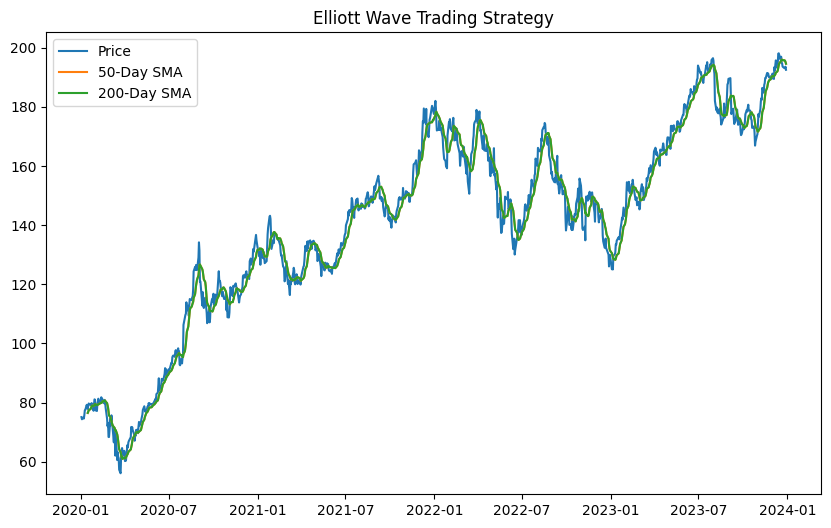

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt

# # Step 1: Download stock data
# data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')

# # Step 2: Calculate key indicators (SMA, Fibonacci retracement, etc.)
# data['SMA_50'] = ta.sma(data['Close'], timeperiod=50)
# data['SMA_200'] = ta.sma(data['Close'], timeperiod=200)

# # Calculate Fibonacci retracement levels based on high and low of the past
# high_price = data['High'].max()
# low_price = data['Low'].min()

# # Fibonacci retracement levels (0.618, 0.5, 0.382 are commonly used levels)
# fib_levels = {
#     '0.618': high_price - (0.618 * (high_price - low_price)),
#     '0.5': high_price - (0.5 * (high_price - low_price)),
#     '0.382': high_price - (0.382 * (high_price - low_price)),
# }

# # Step 3: Define the Elliott Wave logic
# def detect_wave_patterns(df):
#     # Logic to detect waves based on price patterns
#     # This is a simplified approach based on trend and Fibonacci levels
#     # Actual implementation would need more sophisticated pattern recognition
    
#     if df['Close'][-1] > df['SMA_50'][-1] and df['Close'][-1] > df['SMA_200'][-1]:
#         return "Wave 3 or 5 - Strong uptrend"
#     elif df['Close'][-1] < df['SMA_50'][-1] and df['Close'][-1] > fib_levels['0.618']:
#         return "Wave 4 - Potential Correction"
#     else:
#         return "Not clear"

# # Step 4: Apply wave detection to the dataset
# data['Wave'] = data.apply(detect_wave_patterns, axis=1)

# ==========================================================

# Step 1: Download stock data
data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')

# Step 2: Calculate key indicators (SMA)
data['SMA_50'] = ta.sma(data['Close'], timeperiod=50)
data['SMA_200'] = ta.sma(data['Close'], timeperiod=200)

# Step 3: Define the Elliott Wave logic
def detect_wave_patterns(row):
    # 'row'는 단일 행을 나타냅니다. 따라서 각 값을 직접 비교합니다.
    if row['Close'] > row['SMA_50'] and row['Close'] > row['SMA_200']:
        return "Wave 3 or 5 - Strong uptrend"
    elif row['Close'] < row['SMA_50'] and row['Close'] > row['SMA_200']:
        return "Wave 4 - Potential Correction"
    else:
        return "Not clear"

# Step 4: Apply wave detection to the dataset
data['Wave'] = data.apply(detect_wave_patterns, axis=1)


# Step 5: Trading signals
def trading_strategy(df):
    # Buy on Wave 3 or 5, sell on Wave 4
    if df['Wave'] == "Wave 3 or 5 - Strong uptrend":
        return "Buy"
    elif df['Wave'] == "Wave 4 - Potential Correction":
        return "Sell"
    else:
        return "Hold"

data['Signal'] = data.apply(trading_strategy, axis=1)



# Step 6: Backtesting (hypothetical strategy)
initial_cash = 10000
cash = initial_cash
position = 0

log = []

for index, row in data.iterrows():
    if row['Signal'] == "Buy" and cash > 0:
        # Buy stock
        log.append(f"{index}: Buy at {row['Close']:.2f}")
        position = cash / row['Close']
        cash = 0
    elif row['Signal'] == "Sell" and position > 0:
        # Sell stock
        log.append(f"{index}: Sell at {row['Close']:.2f}")
        cash = position * row['Close']
        position = 0

final_value = cash + (position * data['Close'].iloc[-1])
print(f"Initial Cash: {initial_cash}, Final Portfolio Value: {final_value}")


print("\nTrade Log: ")
for entry in log:
    print(entry)


# Step 7: Plotting the results
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Price')
plt.plot(data['SMA_50'], label='50-Day SMA')
plt.plot(data['SMA_200'], label='200-Day SMA')

#buy_prices = data[data['Signal'] == "BUY"]['Close']
#sell_prices = data[data['Signal'] == "Sell"]['Close']

# print("buy_prices : ")
# print(buy_prices)
# print("Sell Prices :")
# print(sell_prices)

#plt.scatter(buy_prices.index, buy_prices, marker='^', color='green', label='Buy Signal', s=100)
#plt.scatter(sell_prices.index, sell_prices, marker='v', color='red', label='Sell Signal', s=100)

plt.title("Elliott Wave Trading Strategy")
plt.legend()
plt.show()


